In [33]:
import scanpy as sc
import pandas as pd
import os

In [75]:
sc.settings.figdir="../../results/integration/20241021_filtercell/"

In [2]:
reflatent  = sc.read("../../processed_data/integrated_data/20241021_reflatent.h5ad")

In [3]:
adata = sc.read("../../process/pre-intergration/big_data/20241019_lop10_hvg.h5ad")

In [4]:
adata_count = sc.read("../../process/pre-intergration/big_data/20241019_mergeall_filter_gene_step1.h5ad")

In [6]:
adata.layers["counts"] = adata_count[adata.obs_names,adata.var_names].X.copy()

In [9]:
adata.layers["counts"][1:10,1:10].toarray()

array([[0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.]])

In [18]:
adata.layers["counts"][1:10,1:10].toarray()

array([[0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.]])

In [20]:
adata.X = adata.layers["logcounts"]

In [86]:
adata.X[1:10,1:10].toarray()

array([[0.        , 1.58216563, 0.        , 0.        , 1.58216563,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.52653088, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.56101276, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.03915159, 0.64888639, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80024723, 0.        , 0.        ],
       [0.        , 1.20140063, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.26504015, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


In [90]:
adata.obs["size_factors"]

index
ToothNc_Junjun_AAACCCAAGCCTGTCG-1_1     0.339254
ToothNc_Junjun_AAACCCAAGCTAAGTA-1_1     0.217982
ToothNc_Junjun_AAACCCAAGTGATTCC-1_1     1.260583
ToothNc_Junjun_AAACCCACAAGATTGA-1_1     0.263368
ToothNc_Junjun_AAACCCACACAACGAG-1_1     0.857411
                                          ...   
MolarP12_Tomoko_TTTGTTGAGAAGCTGC-1_1    0.675299
MolarP12_Tomoko_TTTGTTGTCCCACAGG-1_1    1.067236
MolarP12_Tomoko_TTTGTTGTCGATTGGT-1_1    1.266410
MolarP12_Tomoko_TTTGTTGTCGGTCGAC-1_1    0.461020
MolarP12_Tomoko_TTTGTTGTCTCTGGTC-1_1    0.136201
Name: size_factors, Length: 339489, dtype: float64

In [14]:
adata.obsm["X_umap"] = reflatent.obsm["X_umap"].copy()
adata.obsm["X_SCANVI"] = reflatent.X.copy()

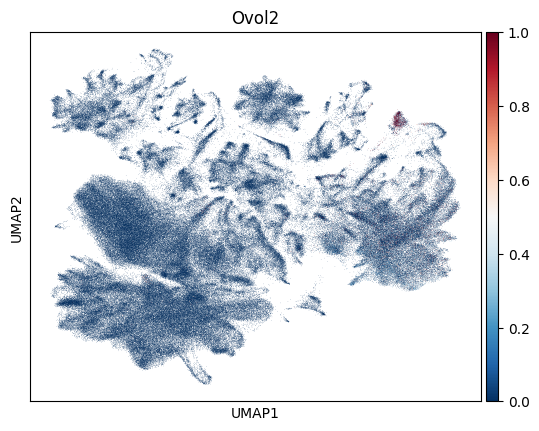

In [25]:
sc.pl.umap(adata,color="Ovol2",use_raw=False,vmax=1,cmap="RdBu_r")

In [26]:
adata.write_h5ad("../../processed_data/integrated_data/20241021_full_log_count.h5ad")

## remove droplets

In [28]:
test = pd.read_csv("../../process/dblFinder/CAGE_Chiba.csv")

In [34]:
# Specify the directory path
directory = "../../process/dblFinder"

# Get the absolute path
abs_directory = os.path.abspath(directory)

# List all files in the directory
files = os.listdir(abs_directory)



In [36]:

# List all CSV files in the directory
csv_files = [f for f in os.listdir(abs_directory) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Read each CSV file and modify row names
for file in csv_files:
    # Full path to the file
    file_path = os.path.join(abs_directory, file)
    
    # Read the CSV file
    df = pd.read_csv(file_path, index_col=0)  # Assuming the first column is the index
    
    # Modify row names by prefixing with file name (without .csv extension)
    df.index = file[:-4] + '_' + df.index.astype(str)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dfs)

In [65]:
atlas2 = pd.read_csv("../../process/dblFinder/Atlas_Jan_Mouse.csv",index_col=0)

In [66]:
atlas2.index = "Atlas_Jan_Mouse_renamed_" + atlas2.index

In [67]:
combined_df = pd.concat([combined_df,atlas2])

In [68]:
combined_df

,scDblFinder_class
MolarP12_Tomoko_AAACCCAGTGCAATGG-1_1,singlet
MolarP12_Tomoko_AAACCCATCCACTGAA-1_1,singlet
MolarP12_Tomoko_AAACGAACACCGGTCA-1_1,singlet
MolarP12_Tomoko_AAACGAAGTCGTTATG-1_1,singlet
MolarP12_Tomoko_AAACGAATCTTAAGGC-1_1,singlet
...,...
Atlas_Jan_Mouse_renamed_one_TTTGACTTCTAGACCA-1,doublet
Atlas_Jan_Mouse_renamed_one_TTTGATCGTCCACACG-1,singlet
Atlas_Jan_Mouse_renamed_one_TTTGATCTCCCGATCT-1,singlet
Atlas_Jan_Mouse_renamed_one_TTTGGAGTCGACTCCT-1,singlet


In [70]:
scDbl = combined_df.loc[adata.obs_names,:]

In [71]:
adata.obs["scDblFinder_class"] = scDbl["scDblFinder_class"].values

In [77]:
adata

AnnData object with n_obs × n_vars = 339489 × 36303
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth position', 'Histology', 'Sex', 'Gene Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related assay', 'Journal', 'Data Source', 'Data location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', '

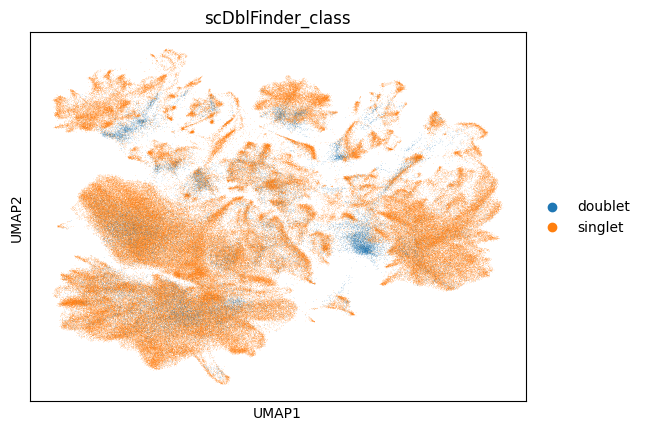

In [76]:
# We can see from umap that doublets form clusters.
sc.pl.umap(adata,color="scDblFinder_class",save="_scdbl")

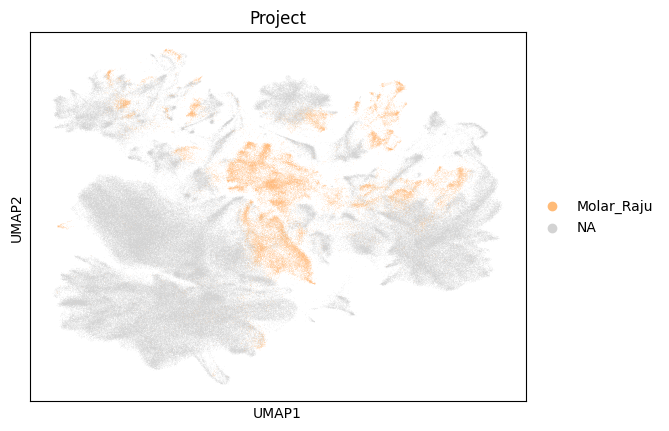

In [78]:
# This datasets is suspecious
sc.pl.umap(adata,color="Project",groups="Molar_Raju",save="_project")

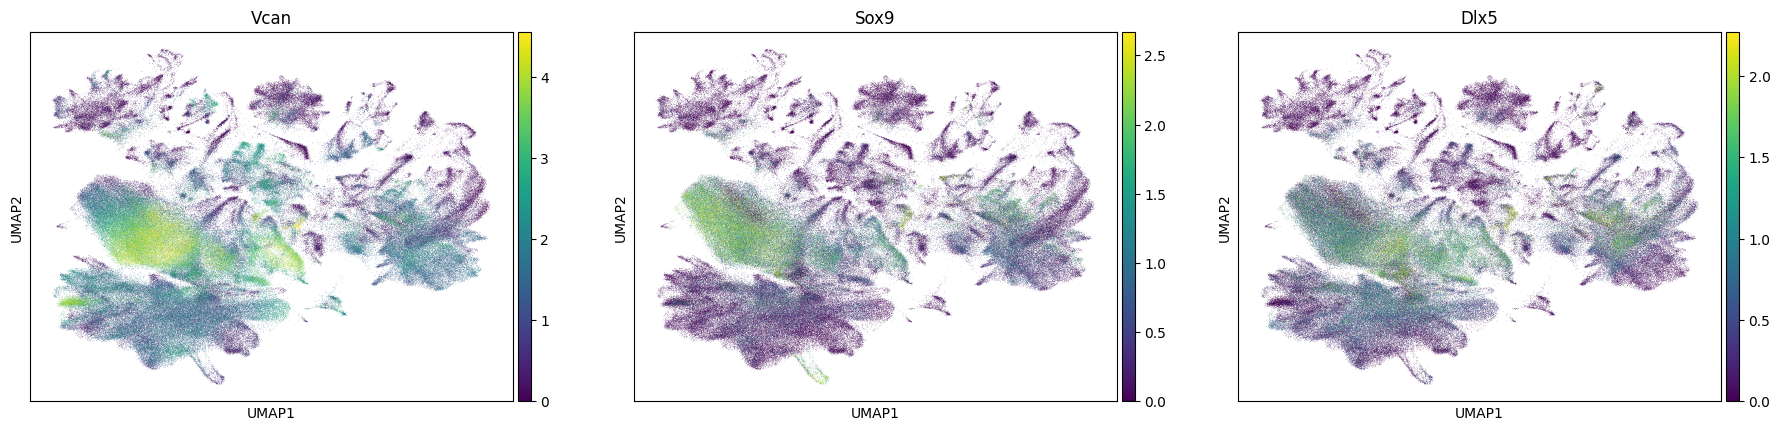

In [94]:
sc.pl.umap(adata,color=["Vcan","Sox9","Dlx5"],use_raw=False,layer="logcounts",vmax="p99")

In [98]:
adata[(adata.obs["Project"] != "Molar_Raju") & (adata.obs["scDblFinder_class"] == "singlet")].copy()

View of AnnData object with n_obs × n_vars = 261929 × 36303
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth position', 'Histology', 'Sex', 'Gene Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related assay', 'Journal', 'Data Source', 'Data location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispers

In [99]:
adata_filtered = adata[(adata.obs["Project"] != "Molar_Raju") & (adata.obs["scDblFinder_class"] == "singlet")].copy()

In [102]:
sc.pp.neighbors(adata_filtered,use_rep="X_SCANVI")
sc.tl.leiden(adata_filtered)
sc.tl.umap(adata_filtered)

/tmp/ipykernel_2713523/1529881888.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_filtered)


In [105]:
adata_filtered

AnnData object with n_obs × n_vars = 261929 × 36303
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth position', 'Histology', 'Sex', 'Gene Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related assay', 'Journal', 'Data Source', 'Data location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispe

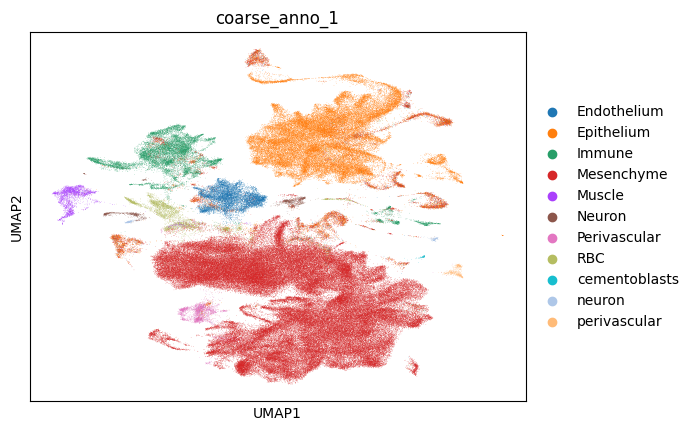

In [104]:
sc.pl.umap(adata_filtered,color="coarse_anno_1")

In [106]:
adata_filtered.write_h5ad("../../processed_data/integrated_data/20241021_filtered_log_count.h5ad")

In [41]:
# Get the set of names from adata.obs_names
adata_names = set(adata.obs_names)
# Get the set of names from the combined DataFrame index
df_names = set(indexCol)

# Find names in adata.obs_names that are not in the DataFrame index
missing_names = adata_names - df_names


In [45]:
len(missing_names)

9164